In [2]:
import numpy as np
import scipy.misc # to visualize only
import os
from PIL import Image
import pickle
import h5py

y = h5py.File('MNIST_synthetic.h5','r')

x = y.get('train_dataset')

x = np.array(x)

i = x[2]
print(i.shape)
img = Image.fromarray(np.uint8(i[:,:,0]))

(64, 64, 1)


In [3]:
def cropImage(pix):
    first__row_white_pixel_index = 64
    first__col_white_pixel_index = 64

    last__row_white_pixel_index = 0
    last__col_white_pixel_index = 0

    # get the first row in which a white pixel appears
    for col in range(0, 64):
        for row in range (0, 64):
            pix_val = pix[row, col]
            if (pix_val == 1 and row < first__row_white_pixel_index):
                first__row_white_pixel_index = row
                break

    # get the first column in which a white pixel occurs
    for row in range(0, 64):
        for col in range (0, 64):
            pix_val = pix[row, col]
            if (pix_val == 1 and col < first__col_white_pixel_index):
                first__col_white_pixel_index = col
                break

    # get the last row in which a white pixel occurs
    for col in range(0, 64):
        for row in range (63, -1, -1):
            pix_val = pix[row, col]
            if (pix_val == 1 and row  > last__row_white_pixel_index):
                last__row_white_pixel_index = row
                break

    # get the last column in which a white pixel occurs
    for row in range(0, 64):
        for col in range (63, -1, -1):
            pix_val = pix[row, col]
            if (pix_val == 1 and col > last__col_white_pixel_index):
                last__col_white_pixel_index = col
                break

    # draw a bounding box according to the above dimensions
    bbox = (first__row_white_pixel_index, first__col_white_pixel_index,last__row_white_pixel_index, last__col_white_pixel_index)
    #return first__row_white_pixel_index, first__col_white_pixel_index,last__row_white_pixel_index, last__col_white_pixel_index
    
#     working_slice = img.crop(bbox).save(os.path.join(os.getcwd(), "slice_num" + str(num) + "_.png"))
    return img.crop(bbox)

In [17]:
i = x[7]
print(i.shape)
#print(i)
img = Image.fromarray(np.uint8(i[:,:,0]))
pix = img.load()
img.show()
newsize = (300, 300) 
im1 = img.resize(newsize)
im1.show()
'''croppedImg = cropImage(pix)
print(croppedImg.size)
print(croppedImg)'''

(64, 64, 1)


'croppedImg = cropImage(pix)\nprint(croppedImg.size)\nprint(croppedImg)'

In [10]:
import cv2

In [12]:
cimg = cv2.cvtColor(np.array(im1), cv2.COLOR_RGB2BGR)

In [15]:
import matplotlib.pyplot as plt

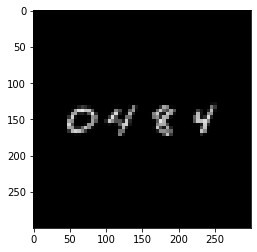

In [16]:
plt.imshow(cimg)

In [18]:
import imutils

In [19]:
gray = cv2.cvtColor(cimg, cv2.COLOR_BGR2GRAY)

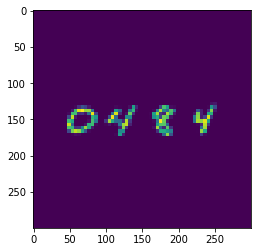

In [20]:
plt.imshow(gray)

In [21]:
blurred = cv2.GaussianBlur(gray, (5,5), 0)

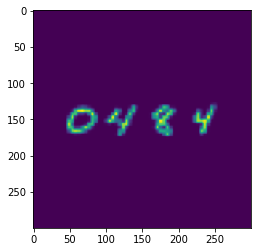

In [22]:
plt.imshow(blurred)

In [23]:
edged = cv2.Canny(blurred, 50, 200, 255)

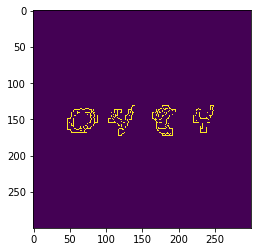

In [24]:
plt.imshow(edged)

In [47]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None
print(cnts)

[array([[[ 64, 135]],

       [[ 63, 136]],

       [[ 56, 136]],

       [[ 56, 137]],

       [[ 55, 138]],

       [[ 55, 139]],

       [[ 53, 141]],

       [[ 52, 141]],

       [[ 52, 146]],

       [[ 51, 147]],

       [[ 51, 148]],

       [[ 50, 149]],

       [[ 47, 149]],

       [[ 47, 164]],

       [[ 50, 164]],

       [[ 51, 165]],

       [[ 51, 166]],

       [[ 52, 167]],

       [[ 52, 168]],

       [[ 74, 168]],

       [[ 74, 166]],

       [[ 74, 167]],

       [[ 73, 168]],

       [[ 71, 168]],

       [[ 70, 167]],

       [[ 70, 165]],

       [[ 70, 167]],

       [[ 69, 168]],

       [[ 53, 168]],

       [[ 51, 166]],

       [[ 51, 164]],

       [[ 48, 164]],

       [[ 47, 163]],

       [[ 47, 150]],

       [[ 48, 149]],

       [[ 51, 149]],

       [[ 51, 147]],

       [[ 52, 146]],

       [[ 52, 142]],

       [[ 54, 140]],

       [[ 55, 140]],

       [[ 55, 138]],

       [[ 57, 136]],

       [[ 63, 136]],

       [[ 64, 135]],

       [[

In [27]:
thresh = cv2.threshold(blurred, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

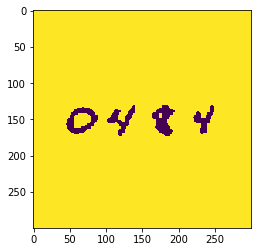

In [28]:
plt.imshow(thresh)

[array([[[ 65, 165]],

       [[ 66, 166]],

       [[ 66, 165]]], dtype=int32), array([[[123, 163]],

       [[123, 164]],

       [[124, 164]]], dtype=int32), array([[[171, 154]]], dtype=int32), array([[[ 49, 154]],

       [[ 50, 155]],

       [[ 50, 154]]], dtype=int32), array([[[116, 147]],

       [[117, 148]],

       [[117, 149]],

       [[119, 149]],

       [[120, 150]],

       [[121, 150]],

       [[122, 151]],

       [[122, 152]],

       [[121, 153]],

       [[122, 153]],

       [[122, 150]],

       [[120, 150]],

       [[119, 149]],

       [[118, 149]]], dtype=int32), array([[[132, 144]],

       [[132, 145]],

       [[133, 145]]], dtype=int32), array([[[169, 143]],

       [[168, 144]],

       [[169, 145]],

       [[170, 144]]], dtype=int32), array([[[113, 143]]], dtype=int32), array([[[108, 141]]], dtype=int32), array([[[118, 140]],

       [[118, 141]]], dtype=int32), array([[[ 78, 139]]], dtype=int32), array([[[116, 138]],

       [[116, 139]],

       [[

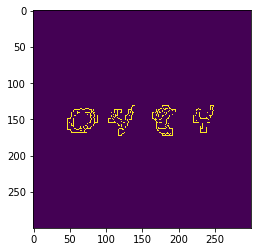

In [48]:
# find contours in the thresholded image, then initialize the
# digit contours lists
e1 = cv2.Canny(blurred, 50, 200, 255)
cnts = cv2.findContours(e1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
plt.imshow(e1)
print(cnts)
digitCnts = []
# loop over the digit area candidates
for c in cnts:
    # compute the bounding box of the contour
    #print (c)
    (x, y, w, h) = cv2.boundingRect(c)
    digitCnts.append(c)

In [49]:
# loop over each of the digits
for c in digitCnts:
    # extract the digit ROI
    (x, y, w, h) = cv2.boundingRect(c)
    print (cv2.boundingRect(c))
    roi = thresh[y:y + h, x:x + w]
    
    # compute the width and height of each of the 7 segments
    # we are going to examine
    (roiH, roiW) = roi.shape
    (dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
    dHC = int(roiH * 0.05)
    final = cv2.rectangle(blurred, (x, y), (x + w, y + h), (0, 255, 0), 1)

(65, 165, 2, 2)
(123, 163, 2, 2)
(171, 154, 1, 1)
(49, 154, 2, 2)
(116, 147, 7, 7)
(132, 144, 2, 2)
(168, 143, 3, 3)
(113, 143, 1, 1)
(108, 141, 1, 1)
(118, 140, 1, 2)
(78, 139, 1, 1)
(103, 138, 17, 21)
(60, 138, 2, 2)
(173, 137, 15, 20)
(164, 136, 28, 37)
(105, 136, 17, 14)
(82, 136, 2, 3)
(225, 135, 6, 4)
(171, 135, 15, 14)
(47, 135, 42, 34)
(220, 131, 29, 39)
(171, 131, 26, 27)
(117, 131, 24, 42)


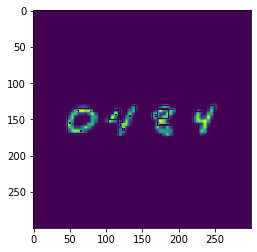

In [50]:
plt.imshow(final)